<a href="https://colab.research.google.com/github/zainabkhalid90/gold-price-prediction-/blob/main/goldstock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**GOLD STOCK PREDICTION ( PROJECT #1 )**

In [ ]:
# Step 1: Data Exploration and Preprocessing
import pandas as pd
import matplotlib.pyplot as plt






In [ ]:
# Load the dataset (adjust the file path as necessary)
file_path = '/content/goldstock.csv'
gold_data = pd.read_csv(file_path)


In [ ]:
# Display the first few rows of the dataset
print(gold_data.head())

# Check for missing values
print(gold_data.isnull().sum())

# Basic statistics
print(gold_data.describe())

# Convert 'Date' to datetime format
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Set 'Date' as index
gold_data.set_index('Date', inplace=True)


   Unnamed: 0        Date   Close    Volume    Open    High     Low
0           0  2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1           1  2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2           2  2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3           3  2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4           4  2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1
Unnamed: 0    0
Date          0
Close         0
Volume        0
Open          0
High          0
Low           0
dtype: int64
        Unnamed: 0        Close         Volume         Open         High  \
count  2511.000000  2511.000000    2511.000000  2511.000000  2511.000000   
mean   1260.792911  1498.726085  185970.770609  1498.725528  1508.451454   
std     729.262879   298.824811   97600.769382   299.118187   301.262244   
min       0.000000  1049.600000       1.000000  1051.500000  1062.700000   
25%     630.500000  1249.850000  126693.500000  1249.500000  1257.300000   
50%    1259

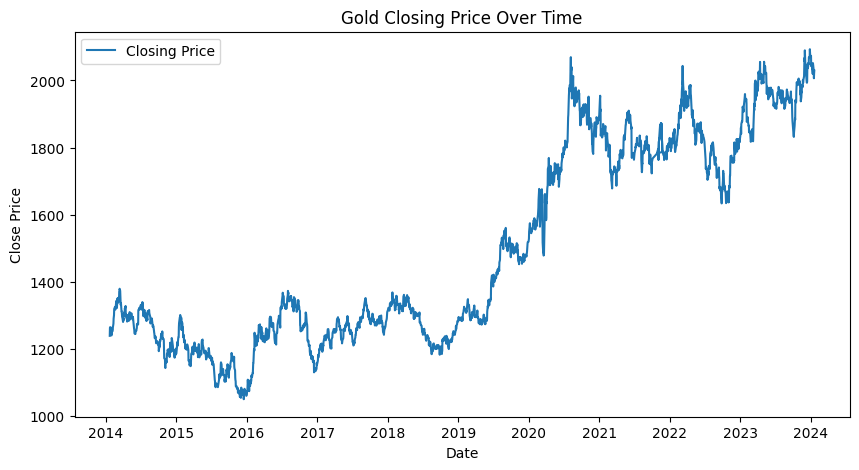

In [ ]:
# Plotting the closing price
plt.figure(figsize=(10,5))
plt.plot(gold_data.index, gold_data['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Gold Closing Price Over Time')
plt.legend()
plt.show()

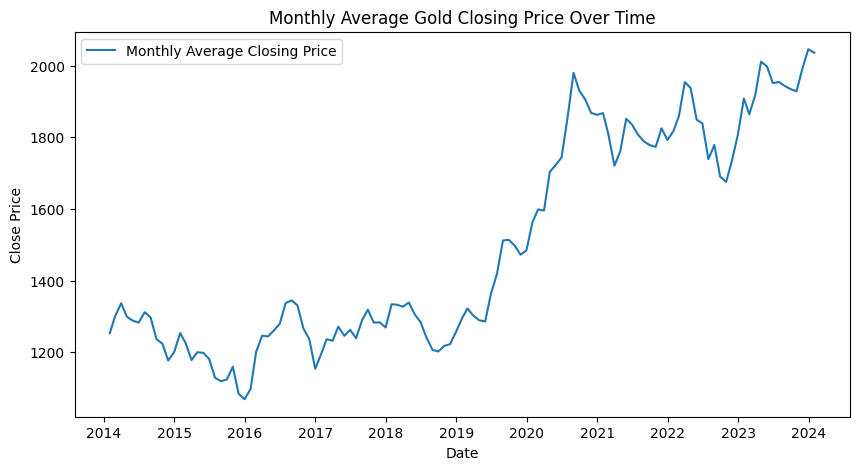

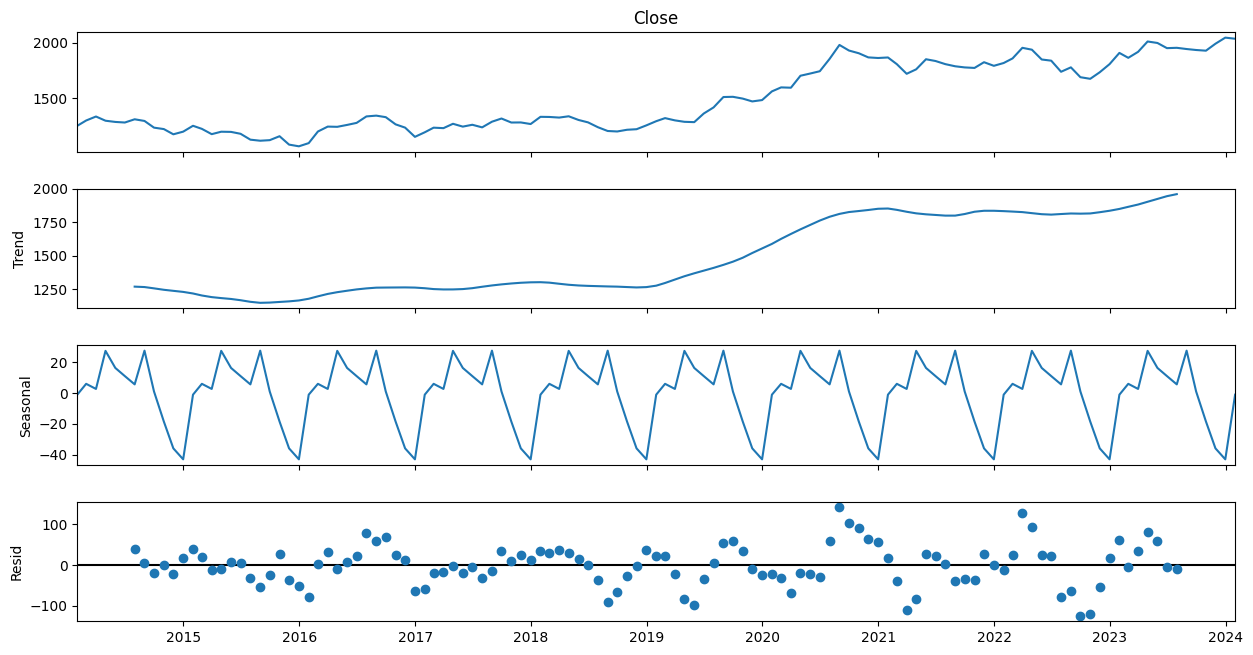

In [ ]:
# Step 2: Time Series Analysis
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample the data to monthly average for better visualization
monthly_gold_data = gold_data['Close'].resample('M').mean()

# Plot monthly average gold prices
plt.figure(figsize=(10,5))
plt.plot(monthly_gold_data, label='Monthly Average Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Monthly Average Gold Closing Price Over Time')
plt.legend()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(monthly_gold_data, model='additive')
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()


<ipython-input-7-7b1789e11ad0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][window:] = np.where(data['Close'][window:] > data['SMA'][window:], 1, 0)


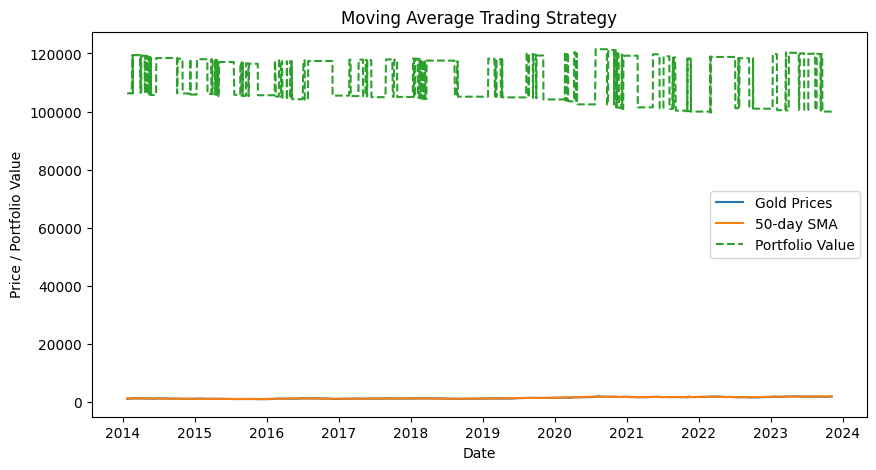

In [ ]:
# Step 4: Trading Strategy Development
import numpy as np

# Simple moving average strategy
def moving_average_strategy(data, window=50):
    data['SMA'] = data['Close'].rolling(window=window).mean()
    data['Signal'] = 0
    data['Signal'][window:] = np.where(data['Close'][window:] > data['SMA'][window:], 1, 0)
    data['Position'] = data['Signal'].diff()
    return data

# Backtesting the strategy
strategy_data = moving_average_strategy(gold_data.copy())
strategy_data.dropna(inplace=True)

initial_capital = 100000
share_size = 10
strategy_data['Portfolio Value'] = initial_capital + (strategy_data['Close'] * strategy_data['Position'] * share_size).cumsum()

plt.figure(figsize=(10,5))
plt.plot(strategy_data['Close'], label='Gold Prices')
plt.plot(strategy_data['SMA'], label='50-day SMA')
plt.plot(strategy_data['Portfolio Value'], label='Portfolio Value', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price / Portfolio Value')
plt.title('Moving Average Trading Strategy')
plt.legend()
plt.show()


In [ ]:
# Step 5: Market Sentiment Analysis
# This step requires external data on market events, which is not included in the provided dataset.

In [ ]:
# Step 6: Statistical Analysis
import scipy.stats as stats

# Calculate daily returns
gold_data['Daily Return'] = gold_data['Close'].pct_change()

# Test for normality
k2, p = stats.normaltest(gold_data['Daily Return'].dropna())
print(f'Normality test p-value: {p}')

# Correlation analysis
correlations = gold_data.corr()
print(correlations)

Normality test p-value: 6.687417788618755e-50
              Unnamed: 0     Close    Volume      Open      High       Low  \
Unnamed: 0      1.000000 -0.889680 -0.101261 -0.889586 -0.888441 -0.891092   
Close          -0.889680  1.000000  0.022835  0.998994  0.999524  0.999576   
Volume         -0.101261  0.022835  1.000000  0.027012  0.030871  0.018274   
Open           -0.889586  0.998994  0.027012  1.000000  0.999459  0.999386   
High           -0.888441  0.999524  0.030871  0.999459  1.000000  0.999251   
Low            -0.891092  0.999576  0.018274  0.999386  0.999251  1.000000   
Daily Return    0.010931  0.017562  0.056996  0.017124  0.016348  0.016095   

              Daily Return  
Unnamed: 0        0.010931  
Close             0.017562  
Volume            0.056996  
Open              0.017124  
High              0.016348  
Low               0.016095  
Daily Return      1.000000  
